# convert pleco dump to spreadsheet

In [1]:
#import xml file
import xml.etree.ElementTree as ET
import csv
tree = ET.parse('./Report.xml')
root = tree.getroot()
card_data = []
for card in root.findall(".//card"):
    card_datum = {}
    card_datum["created_stamp"] = card.get("created")
    card_datum["modified_stamp"] = card.get("modified")
    
    entry = card.find("./entry")
    card_datum["traditional"] = entry.find("./headword[@charset='tc']").text

    if entry.find("./cantopron") is None:
        continue
    card_datum["jyutping"] = entry.find("./cantopron").text
    
    if card.find("scoreinfo") is None:
        continue
    card_datum["correct"] = int(card.find("scoreinfo").get("correct"))
    card_datum["incorrect"] = int(card.find("scoreinfo").get("incorrect"))
    card_datum["difficulty"] = int(card.find("scoreinfo").get("difficulty"))
    card_datum["priority"] = card.find("scoreinfo").get("priority")
    card_datum["last_reviewed_stamp"] = int(card.find("scoreinfo").get("lastreviewedtime"))
    card_data.append(card_datum)
    
    

    
    
#convert xml to csv
import pandas as pd
cards_frame = pd.DataFrame(card_data)
for stamp in ["last_reviewed_stamp","created_stamp","modified_stamp"]:
    cards_frame[stamp] = pd.to_datetime(cards_frame[stamp],unit='s')
    
cards_frame.sort_values("created_stamp", ascending=False,inplace=True)
cards_frame.to_csv('./Report.csv', index = False)


# View 30 Most Recently Added Vocabs

In [2]:
#30 most recently added
cards_frame.sort_values("created_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
932,2021-10-05 20:18:22,2021-10-05 20:20:41,從來,cung4 loi4,0,1,90,None,2021-10-05 20:22:27
931,2021-10-05 20:18:02,2021-10-05 20:20:41,實在,sat6 zoi6,0,1,90,None,2021-10-05 20:22:15
930,2021-10-05 20:15:20,2021-10-05 20:20:41,結果,git3 gwo2,0,1,90,None,2021-10-05 20:21:54
929,2021-10-05 20:14:00,2021-10-05 20:20:41,新款,san1 fun2,0,1,90,None,2021-10-05 20:21:47
928,2021-10-05 20:02:46,2021-10-05 20:20:41,攞,lo2,1,0,100,None,2021-10-05 20:21:50
927,2021-09-30 20:51:25,2021-09-30 20:52:30,名牌,ming4 paai4,0,1,90,None,2021-09-30 20:54:47
926,2021-09-30 20:50:38,2021-09-30 20:52:30,近排,gan6 paai2,0,1,90,None,2021-09-30 20:54:10
925,2021-09-30 20:50:25,2021-09-30 20:52:30,裝修,zong1 sau1,0,1,90,None,2021-09-30 20:55:07
924,2021-09-30 20:49:44,2021-09-30 20:52:30,入嚟,jap6 lai4,0,1,90,None,2021-10-01 17:12:47
923,2021-09-30 20:49:08,2021-09-30 20:52:30,平時,ping4 si4,0,1,90,None,2021-09-30 20:54:05


# View 30 Most Recently Reviewed Vocabs

In [3]:
#30 most recently reviewed
cards_frame.sort_values("last_reviewed_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
427,2020-07-29 19:22:57,2021-07-23 16:14:07,屋企,uk1 kei2,15,12,50,veryhigh,2021-10-05 20:27:45
634,2021-01-06 18:14:26,2021-07-23 16:14:07,非常,fei1 soeng4,8,11,54,veryhigh,2021-10-05 20:27:40
584,2020-11-18 04:12:33,2021-07-28 18:35:29,傾計,king1 gai2,1,12,80,veryhigh,2021-10-05 20:27:06
773,2021-03-31 17:52:37,2021-07-23 16:14:07,唔理,m4 lei5,8,11,50,veryhigh,2021-10-05 20:26:56
25,2020-02-19 02:01:31,2021-08-14 16:01:25,早晨,zou2 san4,20,32,50,veryhigh,2021-10-05 20:26:50
592,2020-11-25 14:42:08,2021-07-23 16:14:07,介意,gaai3 ji3,2,14,70,veryhigh,2021-10-05 20:26:42
742,2021-03-09 19:23:48,2021-07-30 18:24:45,新冠,san1 gun1,5,3,78,veryhigh,2021-10-05 20:26:38
595,2020-11-25 14:43:06,2021-07-23 16:14:07,一切,jat1 cai3,4,8,60,veryhigh,2021-10-05 20:26:18
583,2020-11-18 04:11:09,2021-07-23 16:14:07,自己,zi6 gei2,7,18,50,veryhigh,2021-10-05 20:26:08
417,2020-07-01 15:41:38,2021-09-27 23:14:11,或者,waak6 ze2,6,9,50,veryhigh,2021-10-05 20:25:58


# View 30 Random Vocabs

In [4]:
#30 random words
cards_frame.sample(frac=1).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
657,2021-01-20 16:58:19,2021-07-23 16:14:07,冇耐,mou5 noi6,0,2,90,None,2021-02-09 16:24:29
890,2021-09-01 19:22:49,2021-09-01 19:44:38,菲律賓,fei1 leot6 ban1,1,1,90,None,2021-09-09 21:17:26
329,2020-06-08 01:51:15,2021-07-23 16:14:07,房,fong4,6,11,56,None,2021-03-26 14:53:50
265,2020-05-06 15:32:27,2021-07-23 16:14:07,大學,daai3 hok6,7,7,88,None,2021-02-09 17:07:44
268,2020-05-06 15:35:17,2021-07-23 16:14:07,美金,mei5 gam1,11,3,86,None,2020-11-10 19:43:48
589,2020-11-18 04:39:36,2021-09-27 23:14:11,過嚟,gwo3 lai4,1,1,90,None,2021-09-30 20:53:55
363,2020-06-10 11:14:13,2021-07-23 16:14:07,過山車,gwo3 saan1 ce1,8,6,68,None,2021-02-07 20:07:42
909,2021-09-10 21:26:30,2021-09-27 23:14:11,小朋友,siu2 pang4 jau5,1,0,100,None,2021-09-27 18:53:54
783,2021-04-08 18:52:19,2021-07-23 16:14:07,小籠包,siu2 lung4 baau1,1,5,90,None,2021-05-24 16:41:33
667,2021-01-20 17:04:19,2021-07-23 16:14:07,一直,jat1 zik6,2,1,90,None,2021-02-09 16:09:10


# Cell Reserved for Searching

In [5]:
cards_frame[cards_frame.traditional.str.contains('一')]

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
904,2021-09-10 21:12:25,2021-09-27 23:14:11,一起,jat1 hei2,1,0,100,None,2021-09-27 18:54:38
902,2021-09-01 19:32:38,2021-09-01 19:44:38,一鑊熟,jat1 wok6 suk6,1,1,90,None,2021-09-09 21:34:02
897,2021-09-01 19:29:19,2021-09-01 19:44:38,一天都光晒,jat1 tin1 dou1 gwong1 saai3,1,0,100,None,2021-09-05 15:09:00
825,2021-05-03 22:22:57,2021-07-23 16:14:07,等一陣,dang2 jat1 zan6,2,1,90,None,2021-06-08 16:50:24
823,2021-05-03 22:22:01,2021-07-23 16:14:07,一陣,jat1 zan6,0,2,90,None,2021-06-08 16:45:12
811,2021-04-26 21:10:09,2021-07-23 16:14:07,一半,jat1 bun3,2,3,80,None,2021-05-27 19:26:27
809,2021-04-26 21:04:21,2021-07-23 16:14:07,郁咗一郁,juk1 zo2 jat1 juk1,2,1,90,None,2021-05-24 16:44:35
749,2021-03-09 19:29:35,2021-07-23 16:14:07,一下,jat1 haa6,0,0,100,None,2021-03-09 19:42:22
710,2021-02-09 21:04:08,2021-07-23 16:14:07,一條褲,jat1 tiu4 fu3,0,0,100,None,2021-02-12 23:17:27
667,2021-01-20 17:04:19,2021-07-23 16:14:07,一直,jat1 zik6,2,1,90,None,2021-02-09 16:09:10


# Weekly Review Stats

<AxesSubplot:xlabel='date_'>

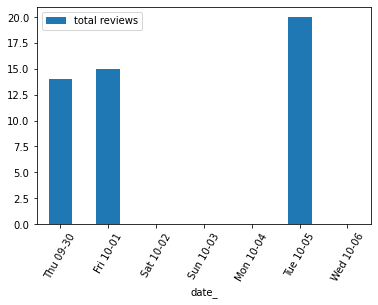

In [6]:
import datetime



today = pd.to_datetime("today").round('1d')
week_range = pd.date_range(today-pd.Timedelta(days=6),today,freq='d')
date2count ={"date":week_range,"total reviews":[0]*7,"date_":[x.strftime('%a %m-%d') for x in week_range]}
for card_stamp in cards_frame["last_reviewed_stamp"]:
    for day_of_week in week_range:
        if day_of_week < card_stamp < day_of_week+pd.Timedelta(days=1):
            date2count["total reviews"][list(week_range).index(day_of_week)] += 1
            break
            

            
            

datesframe = pd.DataFrame(date2count)


datesframe.plot.bar(x='date_', y='total reviews', rot=60)


In [7]:
#clustering

In [8]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# Word vectors
# word_model = Word2Vec.load('wv_word')
# char_model = Word2Vec.load('wv_char')
# pos_model = Word2Vec.load('wv_char_position')

# Facebook's Chinese word vectors.
fb_model = KeyedVectors.load_word2vec_format('toastynews.vec')
vector = fb_model['一']


ModuleNotFoundError: No module named 'gensim'

In [ ]:
from nltk.cluster import KMeansClusterer
import nltk
items = []
for word in cards_frame.traditional:
    word = word.strip("?")
    try:
        fb_model[items + [word]]
    except:
        print(word)
        continue
    items.append(word)


X = fb_model[items]
NUM_CLUSTERS=55
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)




In [ ]:
vocab_lists = {}
longest_length = 0
for i,item in enumerate(items):
    cluster = str(assigned_clusters[i])
    if cluster not in vocab_lists:
        vocab_lists[cluster] = [item]
    else:
        vocab_lists[cluster].append(item)
        if len(vocab_lists[cluster]) > longest_length:
            longest_length = len(vocab_lists[cluster])
for list_ in vocab_lists:
    vocab_lists[list_] += [""]*(longest_length - len(vocab_lists[list_]))
transposed = []
for row_n in range(0,longest_length):
    row = {}
    for listname in vocab_lists.keys():
        row[listname] = vocab_lists[listname][row_n]
    transposed.append(row)
with open("cluster_lists.csv", "w") as f:
    writer = csv.DictWriter(f, fieldnames=vocab_lists.keys())
    writer.writeheader()
    for row in transposed:
        writer.writerow(row)









for i,item in enumerate(items):
    if assigned_clusters[i] == 1:
        print(item)